In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("wine.csv")

In [3]:
data.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
from sklearn.preprocessing import RobustScaler 

In [7]:
X=data.drop(["Wine"],axis=1)

In [25]:
rbs=RobustScaler()

In [26]:
X1=rbs.fit_transform(X)

In [27]:
X1

array([[ 0.8973384 , -0.10472973,  0.20143885, ...,  0.22222222,
         0.92494929,  0.80804954],
       [ 0.11406844, -0.05743243, -0.63309353, ...,  0.25185185,
         0.5030426 ,  0.77708978],
       [ 0.08365019,  0.33445946,  0.89208633, ...,  0.19259259,
         0.31643002,  1.05572755],
       ...,
       [ 0.16730038,  1.63175676, -0.28776978, ..., -1.11111111,
        -0.98985801,  0.33333333],
       [ 0.09125475,  0.48986486,  0.02877698, ..., -1.08148148,
        -0.94117647,  0.34365325],
       [ 0.82129278,  1.51013514,  1.09352518, ..., -1.05185185,
        -0.95740365, -0.23426213]])

In [40]:
from sklearn.decomposition import PCA

In [41]:
pc=PCA(n_components=2)

In [46]:
X2=pc.fit_transform(X1)

In [48]:
X2.shape

(178, 2)

In [10]:
corr=data[data.columns].corr()

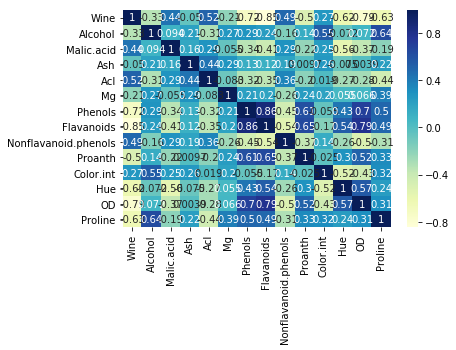

In [15]:
sns.heatmap(corr,cmap="YlGnBu",annot=True)

From the above diagram it is clear that all the columns are some what related to each other.


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Wine                    178 non-null int64
Alcohol                 178 non-null float64
Malic.acid              178 non-null float64
Ash                     178 non-null float64
Acl                     178 non-null float64
Mg                      178 non-null int64
Phenols                 178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid.phenols    178 non-null float64
Proanth                 178 non-null float64
Color.int               178 non-null float64
Hue                     178 non-null float64
OD                      178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [18]:
data.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


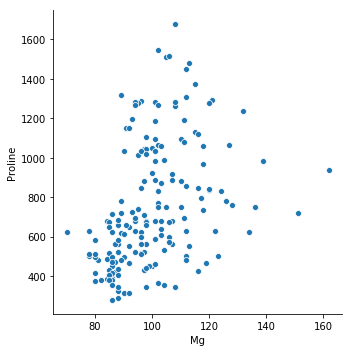

In [21]:
sns.relplot(x="Mg",y="Proline",data=data)

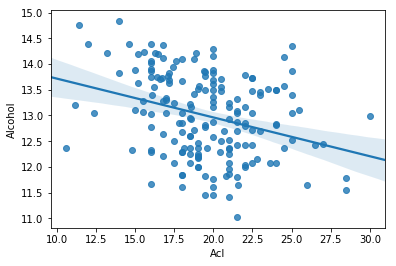

In [22]:
sns.regplot(x="Acl",y="Alcohol",data=data)

Hierarchial Clustering by Aggolomerative Clustering :

In [49]:
import scipy.cluster.hierarchy as sch 

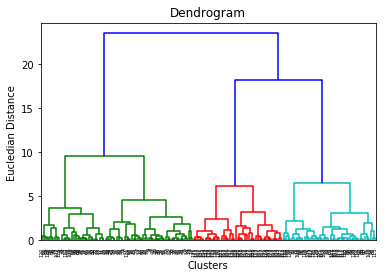

In [55]:
dendrogram=sch.dendrogram(sch.linkage(X2,method="ward"))
plt.title("Dendrogram")
plt.xlabel("Clusters")
plt.ylabel("Eucledian Distance ")
plt.show()

In [56]:
from sklearn.cluster import AgglomerativeClustering

In [59]:
hc=AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="ward")

In [60]:
yam=hc.fit_predict(X2)

In [64]:
yam


array([1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 3, 3, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 3, 0, 3,
       3, 0, 0, 3, 0, 3, 0, 1, 3, 0, 0, 0, 3, 3, 0, 3, 0, 2, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 3, 0, 3, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

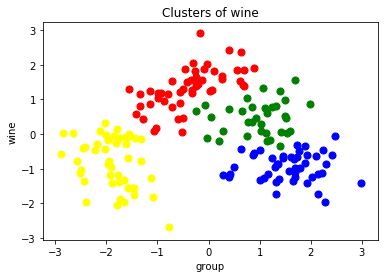

In [66]:
plt.scatter(X2[yam==0,0],X2[yam==0,1],c="red",s=50,label="Cluster1")
plt.scatter(X2[yam==1,0],X2[yam==1,1],c="blue",s=50,label="Cluster2")
plt.scatter(X2[yam==2,0],X2[yam==2,1],c="yellow",s=50,label="Cluster3")
plt.scatter(X2[yam==3,0],X2[yam==3,1],c="green",s=50,label="Cluster4")
plt.title("Clusters of wine")
plt.xlabel("group")
plt.ylabel("wine")
plt.show()
